In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
dataset = pd.read_csv('data/AirQualityUCI.csv', sep=';', decimal=',')

In [149]:
dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [150]:
dataset.columns.values

array(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15',
       'Unnamed: 16'], dtype=object)

In [151]:
dataset = dataset.drop(['Unnamed: 15', 'Unnamed: 16'], 1)

In [152]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [153]:
dataset.dropna(axis=0, how= 'all', inplace=True)

In [154]:
dataset.replace(to_replace=-200, value=np.nan, inplace = True)

In [155]:
dataset.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [156]:
# Let's Drop NMHC(GT)
dataset = dataset.drop('NMHC(GT)', 1)

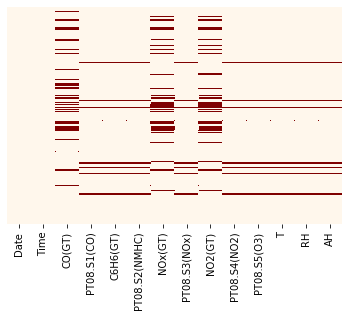

In [157]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='OrRd')

In [158]:
dataset[['CO(GT)','C6H6(GT)','T','RH','AH']] = dataset[['CO(GT)','C6H6(GT)','T','RH','AH']].apply(pd.to_numeric)

In [159]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


In [160]:
dataset['DateTime'] = dataset['Date'] + ' ' + dataset['Time']
dataset.drop('Time', 1)
dataset['DateTime']

0       10/03/2004 18.00.00
1       10/03/2004 19.00.00
2       10/03/2004 20.00.00
3       10/03/2004 21.00.00
4       10/03/2004 22.00.00
               ...         
9352    04/04/2005 10.00.00
9353    04/04/2005 11.00.00
9354    04/04/2005 12.00.00
9355    04/04/2005 13.00.00
9356    04/04/2005 14.00.00
Name: DateTime, Length: 9357, dtype: object

In [161]:
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'].astype(str), format='%d/%m/%Y %H.%M.%S')

In [162]:
dataset['DateTime']

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: DateTime, Length: 9357, dtype: datetime64[ns]

In [144]:
dataset['Year'] = dataset['DateTime'].map(lambda x: x.year)

In [146]:
dataset["T"] = dataset.groupby("Date")["T"].transform(lambda x: x.fillna(x.mean()))
dataset["CO(GT)"] = dataset.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
dataset["NOx(GT)"] = dataset.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
dataset["NO2(GT)"] = dataset.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

ValueError: Length mismatch: Expected axis has 9357 elements, new values have 9471 elements